In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Projects_\Mobile Price prediction\Flipkart Mobile - 2.csv')

In [3]:
df.head(5)

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [4]:
df=df.drop(columns=['model','base_color','num_of_ratings','discount_percent','sales'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   processor         430 non-null    object 
 2   screen_size       430 non-null    object 
 3   ROM               430 non-null    int64  
 4   RAM               430 non-null    int64  
 5   display_size      430 non-null    float64
 6   num_rear_camera   430 non-null    int64  
 7   num_front_camera  430 non-null    int64  
 8   battery_capacity  430 non-null    int64  
 9   ratings           430 non-null    float64
 10  sales_price       430 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 37.1+ KB


In [6]:
# Shape of the Dataset
print("Shape of Training dataset:", df.shape)

# Checking null values for training dataset
df.isnull().sum()

Shape of Training dataset: (430, 11)


brand               0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
sales_price         0
dtype: int64

In [7]:
df.dtypes

brand                object
processor            object
screen_size          object
ROM                   int64
RAM                   int64
display_size        float64
num_rear_camera       int64
num_front_camera      int64
battery_capacity      int64
ratings             float64
sales_price           int64
dtype: object

In [8]:
df.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,sales_price
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,25433.234884
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,22471.926588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,5742.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,11999.000000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,16989.500000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,28999.000000
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,157999.000000


In [9]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

(8, 8)

<AxesSubplot:>

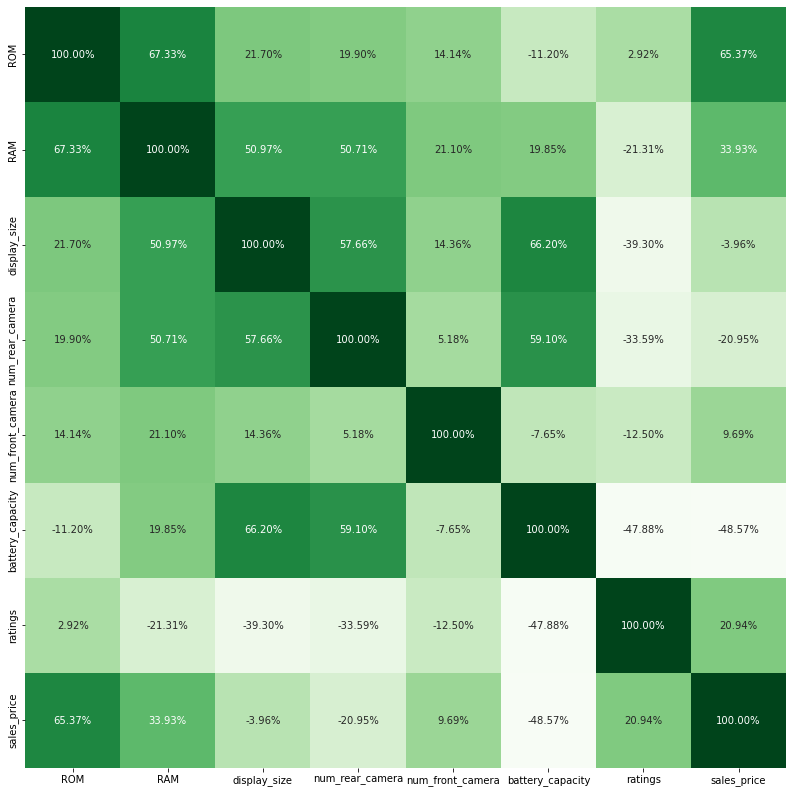

In [10]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

<AxesSubplot:>

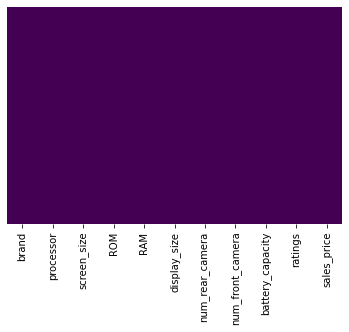

In [11]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [12]:
X = df.drop(columns=['sales_price'])
y = np.log(df['sales_price'])

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso

In [15]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9154641880283786
MAE 0.1489837708238656


In [16]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8615695524100441
MAE 0.19310148194515675


In [17]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9050994012221464
MAE 0.16292184003160065


In [18]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9160505751790627
MAE 0.11916448903955199


In [19]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9157487873179229
MAE 0.10690468662103034


In [20]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(X_train,y_train)

y_pred = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.956731335069666
MAE 0.09897444279350985


In [21]:
import pickle

#pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe2,open('pipe2.pkl','wb'))